In [1]:
%pylab inline
import ROOT
import root_numpy
import pandas as pd
import glob
import os.path
import sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyAmsUtils import *

In [3]:
filenames = sorted(glob.glob("/data/13*.root"), key=os.path.getmtime)[:-1]
#filenames = ["/root/AMSDeutons/test.root"]

In [8]:
def get_frame(f):
    tfile = ROOT.TFile(f)
    tree  = tfile.Get("selections")
    return tree_to_frame(tree) 

In [9]:
data = get_frame(filenames[8])
data['Mass'] = get_mass(data['R'], data['BetaTOF'])
for c,mx in [('R',20), ('Latitude',1), ('Mass',3)]:
    bins = np.linspace(0,mx,101)
    data[c+'_bin'] = pd.cut(data[c], bins=bins, labels=bins[:-1])

In [14]:
data['Mass_bin'].value_counts().sort_index().plot(kind='steps')

ValueError: 'steps' is not a valid plot kind

In [ ]:
def get_frame(f):
    tfile = ROOT.TFile(f)
    tree  = tfile.Get("selections")
    return tree_to_frame(tree) 

In [5]:
def get_frame(f):
    tfile = ROOT.TFile(f)
    tree  = tfile.Get("selections")
    return tree_to_frame(tree) 

In [5]:
def get_frame(f):
    tfile = ROOT.TFile(f)
    tree  = tfile.Get("selections")
    return tree_to_frame(tree) 

p = Progress(80, len(filenames))
counts = {}
for i,f in enumerate(filenames):
    p.step(i)
    frame = get_frame(f)
    counts[f] = frame['PhysBPatt'].value_counts()
sys.stdout.write("\n")

----------------------------------------------------------------------------------------------------
##################################################################################################################################


In [6]:
pattcounts = pd.DataFrame(counts).sum(axis=1)
pattcounts.index = pattcounts.index.map(lambda x:np.binary_repr(x,8))

# Counts (linear scale)

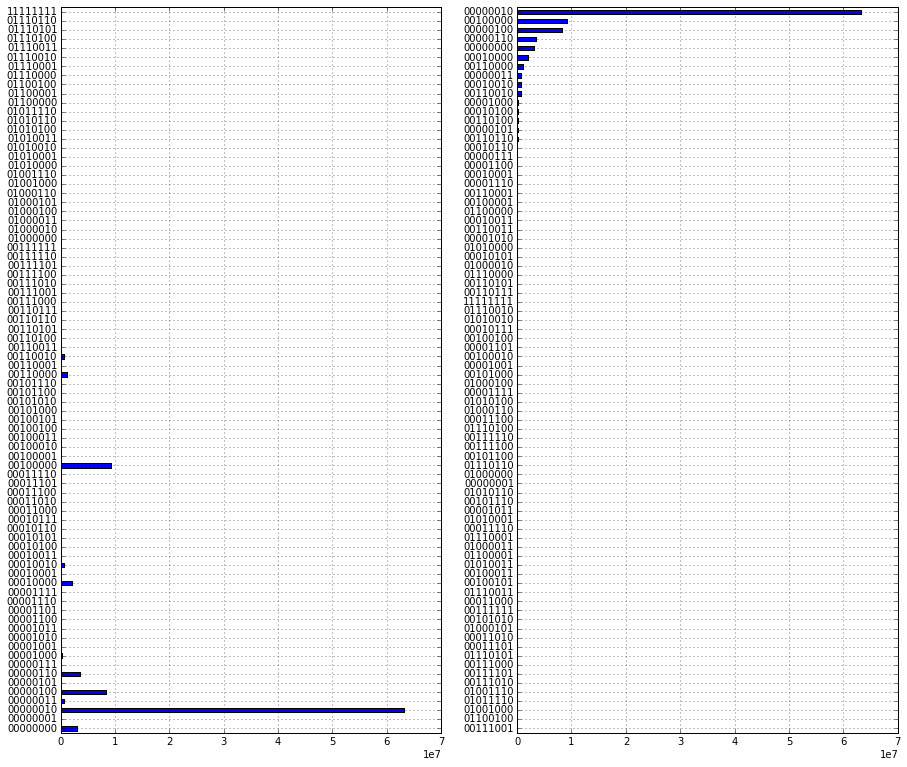

In [7]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh')
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh')

#Counts (Log scale)

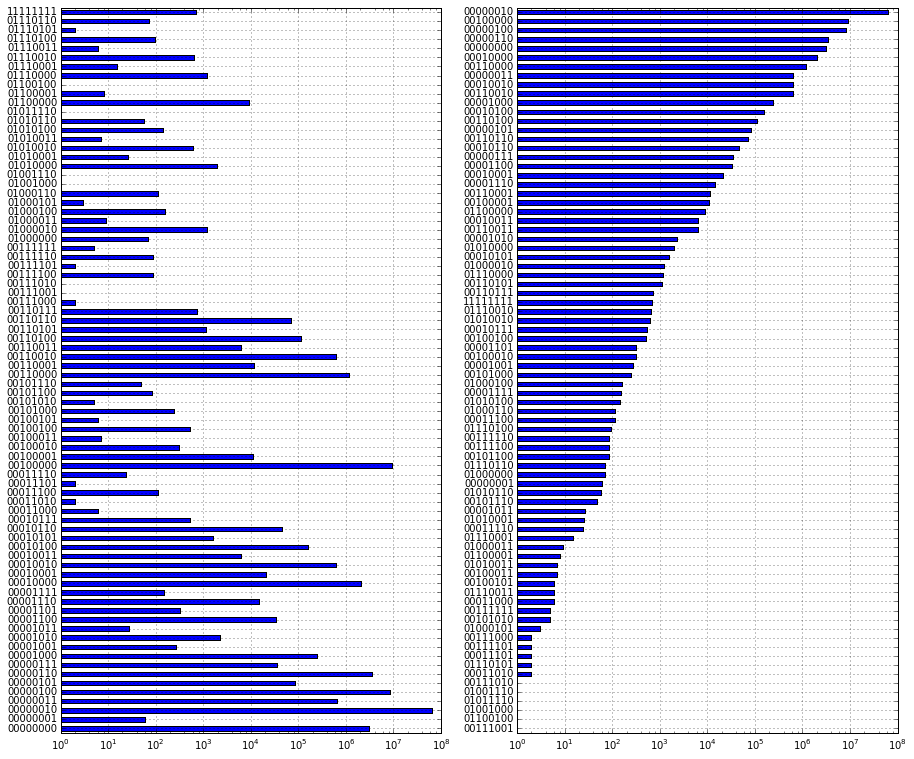

In [8]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh', logx=True)
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh', logx=True)